# ECOD Algorithm in Details

In [1]:
import os
import sys

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
# sys.path.append(os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

In [2]:
from pyod.models.ecod import ECOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [6]:
print(sys.executable)
print(sys.version_info)

/opt/homebrew/Caskroom/mambaforge/base/envs/anom-detect-env/bin/python3.9
sys.version_info(major=3, minor=9, micro=19, releaselevel='final', serial=0)



On Training Data:
ECOD ROC:0.9562, precision @ rank n:0.65

On Test Data:
ECOD ROC:0.935, precision @ rank n:0.4


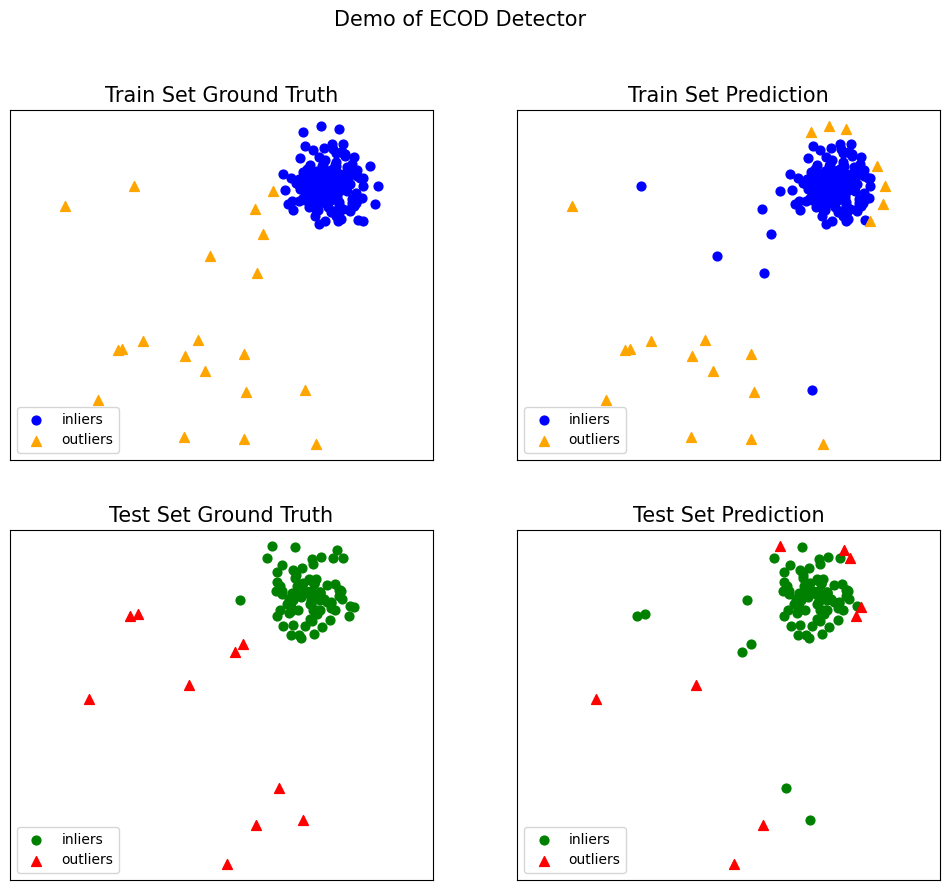

In [3]:
if __name__ == "__main__":
    contamination = 0.1                        # percentage of outliers
    n_train = 200                              # number of training points
    n_test = 100                               # number of testing points

    # Generate sample data
    X_train, X_test, y_train, y_test = \
        generate_data(n_train=n_train,
                      n_test=n_test,
                      n_features=2,
                      contamination=contamination,
                      random_state=42)

    # train ECOD detector
    clf_name = 'ECOD'
    clf = ECOD()

    # you could try parallel version as well.
    # clf = ECOD(n_jobs=2)
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_                                           # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_                                # raw outlier scores

    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores

    # evaluate and print the results
    print("\nOn Training Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
    print("\nOn Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    # visualize the results
    visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True, save_figure=False)